In [2]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
import os
import re
import matplotlib.pyplot as plt

In [3]:
os.chdir("D:\\OneDrive - Manipal Global Education Services Pvt Ltd\\Official\\MGAIT\\Datasets")

In [4]:
df = pd.read_csv('emails.txt') #read the CSV file

In [5]:
df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
df.shape

(5728, 2)

In [8]:
df.columns

Index(['text', 'spam'], dtype='object')

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(5695, 2)

In [11]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [64]:
df.spam.value_counts(normalize=True)

0    0.759789
1    0.240211
Name: spam, dtype: float64

In [12]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import SnowballStemmer

In [13]:
def clean_txt(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub("[^\w\s]","",result)
    tokens = word_tokenize(sent.lower())
    stop_updated = stopwords.words("english")  +  ["would", "could","told","subject"]
    text = [term for term in tokens if term not in stop_updated and len(term) > 2] 
    res = " ".join(text)
    return res

In [14]:
df['text'] = df.text.apply(clean_txt)

In [15]:
df.head()

,text,spam
0,naturally irresistible corporate identity real...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new homes made easy wanting show ...,1
3,color printing special request additional info...,1
4,money get software cds software compatibility ...,1


In [16]:
X = df.text.values
y = df.spam.values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [19]:
print(X_train_tfidf.shape,X_test_tfidf.shape)

(3986, 3500) (1709, 3500)


In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [21]:
y_pred = classifier.predict(X_test_tfidf)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve,auc

In [23]:
accuracy_score(y_test,y_pred)

0.981275599765945

In [24]:
confusion_matrix(y_test,y_pred)

array([[1263,    6],
       [  26,  414]], dtype=int64)

In [59]:
New_Email = pd.DataFrame([["undelivered email error"],["visiting bangalore, on leave"]], columns = ["text"])
New_Email

,text
0,undelivered email error
1,"visiting bangalore, on leave"


In [ ]:
#Making predictions on new dataset

In [60]:
New_Email['clean_text'] = New_Email.text.apply(clean_txt)

In [61]:
New_Email.clean_text.values

array(['undelivered email error', 'visiting bangalore leave'],
      dtype=object)

In [62]:
newemail_tfidf = tfidf_vectorizer.transform(New_Email.clean_text.values)

In [63]:
classifier.predict(newemail_tfidf)

array([1, 0], dtype=int64)

In [27]:
f1_score(y_test,y_pred)

0.9627906976744187

In [28]:
def compute_auc(test, train_instance):
    probs = train_instance.predict_proba(test)
    prob_positive = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test,prob_positive)
    roc_auc = auc(fpr,tpr)
    return roc_auc,fpr,tpr,threshold

In [31]:
roc_auc, fpr, tpr,th = compute_auc(X_test_tfidf,classifier)
roc_auc

0.9977836879432624

In [33]:
def plot_ROC(roc,fpr,tpr):
    plt.title("receiver Operating Charecteristc")
    plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    plt.show()

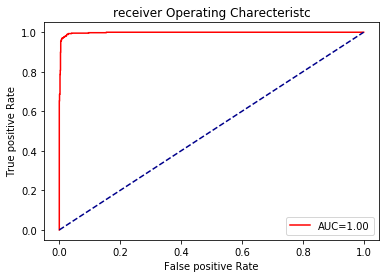

In [34]:
plot_ROC(roc_auc,fpr,tpr)

In [40]:
ftt = pd.DataFrame(np.hstack((th.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])
ftt.head(20)

,threshold,fpr,tpr
0,1.999981,0.000000,0.000000
1,0.999981,0.000000,0.002273
2,0.999303,0.000000,0.159091
3,0.999300,0.000000,0.163636
4,0.998913,0.000000,0.211364
5,0.998908,0.000000,0.215909
6,0.982199,0.000000,0.375000
7,0.981865,0.000000,0.379545
8,0.965220,0.000000,0.465909
9,0.965091,0.000000,0.475000


In this scenario :
- FP means an email which is actually not spam but  predicted as spam - Type-1 error
- FN means an email which is actually not a spam but not the model predicted it as spam - Type-2 error
since there exists a tradeoff between FN and FP, lets try to minimize FP's so that we avoid flagging of our important emails as spams


Hence from the ROC curve choose that threshold which results in small FP's

In [39]:
probs = classifier.predict_proba(X_test_tfidf)
prob_positive = probs[:,1]


In [ ]:
#Predictions for various values of threshold
#0.993, 0.8858....

In [65]:
new_pred = (prob_positive>0.993).astype("int")
new_pred

array([0, 0, 0, ..., 0, 0, 1])

In [66]:
cm = confusion_matrix(y_test,new_pred)
cm

array([[1269,    0],
       [ 302,  138]], dtype=int64)